In [1]:
import pyforest

In [31]:
df = pd.read_csv('overwatch-diary.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,...,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,scoped,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,12/4/2016,NaN,3,1.0,2387,NaN,NaN,NaN,Win,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/4/2016,NaN,3,2.0,2387,2367,-20,NaN,Loss,2617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/4/2016,NaN,3,2.0,NaN,NaN,NaN,NaN,Loss,2617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/4/2016,NaN,3,3.0,2367,2367,0,NaN,-,2680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/15/2016,NaN,3,4.0,2367,2367,0,NaN,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

date                        object
time                        object
season                       int64
game_id                    float64
sr_start                    object
sr_finish                   object
sr_delta                    object
streak_number               object
result                      object
my_team_sr                  object
enemy_team_sr               object
team_sr_delta               object
my_team_1                   object
my_team_2                   object
my_team_3                   object
my_team_4                   object
my_team_5                   object
my_team_6                   object
enemy_team_1                object
enemy_team_2                object
enemy_team_3                object
enemy_team_4                object
enemy_team_5                object
enemy_team_6                object
map                         object
round                       object
capscore                    object
score_distance              object
time_left           

In [6]:
df.isna()

,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,...,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,scoped,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,False,True,False,False,False,True,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,True,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,True,False,False,True,True,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,True,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,True,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3295,False,False,False,False,True,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3296,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3297,False,False,False,False,True,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [7]:
df.isna().sum()

date                          0
time                       1794
season                        0
game_id                     732
sr_start                   1625
sr_finish                  1627
sr_delta                   1627
streak_number              1045
result                        0
my_team_sr                   44
enemy_team_sr                44
team_sr_delta                48
my_team_1                     4
my_team_2                    10
my_team_3                    12
my_team_4                    12
my_team_5                    16
my_team_6                    14
enemy_team_1                 29
enemy_team_2                 26
enemy_team_3                 25
enemy_team_4                 25
enemy_team_5                 25
enemy_team_6                 25
map                           0
round                         6
capscore                     23
score_distance             1517
time_left                   518
team_role                     5
match_length                107
charcter

In [9]:
df.shape

(3299, 50)

In [10]:
df.columns

Index(['date', 'time', 'season', 'game_id', 'sr_start', 'sr_finish',
       'sr_delta', 'streak_number', 'result', 'my_team_sr', 'enemy_team_sr',
       'team_sr_delta', 'my_team_1', 'my_team_2', 'my_team_3', 'my_team_4',
       'my_team_5', 'my_team_6', 'enemy_team_1', 'enemy_team_2',
       'enemy_team_3', 'enemy_team_4', 'enemy_team_5', 'enemy_team_6', 'map',
       'round', 'capscore', 'score_distance', 'time_left', 'team_role',
       'match_length', 'charcter_1', 'character_2', 'character_3',
       'communication', 'note', 'psychological_condition', 'eliminations',
       'objective_kills', 'damage', 'healing', 'deaths', 'weapon_accuracy',
       'offensive_assists', 'defensive_assists', 'scoped', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49'],
      dtype='object')

In [11]:
df.result.value_counts()

L       1050
W       1032
Loss     467
Win      453
Draw     261
-         33
l          2
DC         1
Name: result, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

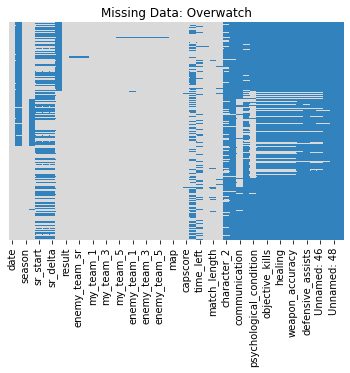

In [12]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Overwatch')
plt.show()

In [14]:
rows = df.shape[0]
null_total = df.isnull().sum()
missing_percent = (null_total/rows)*100
missing_percent

date                        0.000000
time                       54.380115
season                      0.000000
game_id                    22.188542
sr_start                   49.257351
sr_finish                  49.317975
sr_delta                   49.317975
streak_number              31.676266
result                      0.000000
my_team_sr                  1.333737
enemy_team_sr               1.333737
team_sr_delta               1.454986
my_team_1                   0.121249
my_team_2                   0.303122
my_team_3                   0.363747
my_team_4                   0.363747
my_team_5                   0.484995
my_team_6                   0.424371
enemy_team_1                0.879054
enemy_team_2                0.788118
enemy_team_3                0.757805
enemy_team_4                0.757805
enemy_team_5                0.757805
enemy_team_6                0.757805
map                         0.000000
round                       0.181873
capscore                    0.697181
s

In [15]:
pd.DataFrame(missing_percent ,columns = ["missing_percent"])

<IPython.core.display.Javascript object>

,missing_percent
date,0.000000
time,54.380115
season,0.000000
game_id,22.188542
sr_start,49.257351
sr_finish,49.317975
sr_delta,49.317975
streak_number,31.676266
result,0.000000
my_team_sr,1.333737


In [32]:
df.drop(['note','eliminations','objective_kills','damage','healing','deaths','weapon_accuracy',
      'offensive_assists','defensive_assists','scoped',
         'Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49'],axis=1, inplace= True)

In [33]:
df.dtypes

date                        object
time                        object
season                       int64
game_id                    float64
sr_start                    object
sr_finish                   object
sr_delta                    object
streak_number               object
result                      object
my_team_sr                  object
enemy_team_sr               object
team_sr_delta               object
my_team_1                   object
my_team_2                   object
my_team_3                   object
my_team_4                   object
my_team_5                   object
my_team_6                   object
enemy_team_1                object
enemy_team_2                object
enemy_team_3                object
enemy_team_4                object
enemy_team_5                object
enemy_team_6                object
map                         object
round                       object
capscore                    object
score_distance              object
time_left           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

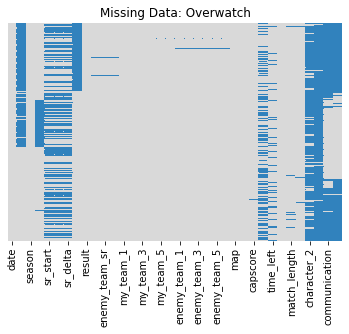

In [34]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Overwatch')
plt.show()

In [ ]:
df.drop(['character_2','character_3',''],axis=1, inplace= True)